In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from NeuralNetwork import NeuralNetwork

In [2]:
data = pd.read_csv("data.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.510499,0.909227,-1.370507,-0.475125,-0.230739,-0.457043,-0.372294,0.574517,1.258719,-0.578153,-0.961563,2
1,-0.280676,1.892418,-1.370507,0.057517,0.223040,0.919349,0.624466,0.052448,-0.707068,0.138438,-0.596108,2
2,-0.280676,1.236957,-1.166564,-0.170758,0.099282,-0.063788,0.231803,0.156862,-0.326593,-0.040710,-0.596108,2
3,1.672822,-1.384886,1.484700,-0.475125,-0.251365,0.132839,0.413032,0.678931,-0.960718,-0.458721,-0.596108,3
4,-0.510499,0.690740,-1.370507,-0.551216,-0.251365,-0.260415,-0.191065,0.574517,1.258719,-0.578153,-0.961563,2


In [3]:
X = data.drop(columns=["quality"]).values
y = data["quality"].values 

In [4]:
classes = np.unique(y)
n_classes = len(classes) #liczba neuronów w warstwie wyjściowej

class_to_idx = {c: i for i, c in enumerate(classes)}
y_idx = np.array([class_to_idx[c] for c in y])

def one_hot(y, n_classes):
    Y = np.zeros((n_classes, y.size))
    for i, cls in enumerate(y):
        Y[cls, i] = 1.0
    return Y

## Hiperparametry

In [5]:
#zostalo raz odpalone dla testu -> dlugi czas trenowania sieci
architectures = [[16],[32],[32, 16]] 

learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3] 
batch_sizes = [None, 16, 32, 64] 
epochs_list = [300, 500, 700, 900] 

seeds = range(10)

In [6]:
architectures = [[16],[32],[32, 16]] #liczba warstw ukrytych oraz liczba neuronów w każdej warstwie

learning_rates = [0.05, 0.1] #współczynnik uczenia - szybkość aktualizacji wag w algorytmie spadku gradientu
batch_sizes = [None, 32] #liczba próbek używanych do obliczenia gradientu
epochs_list = [300, 500] #liczba epok - liczba pełnych przejść przez zbiór treningowy

seeds = range(10)

In [7]:
best_config_sgd = None
best_val_acc_sgd = -1.0

for hidden_layers in architectures:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            for epochs in epochs_list:
                val_accuracies = []
                for seed in seeds:
                    X_train, X_temp, y_train, y_temp = train_test_split( #podzial 70 / 15 / 15
                        X, y_idx,
                        test_size=0.30,
                        random_state=seed,
                        stratify=y_idx
                    )

                    X_val, X_test, y_val, y_test = train_test_split(
                        X_temp, y_temp,
                        test_size=0.50,
                        random_state=seed,
                        stratify=y_temp
                    )

                    Xtr = X_train.T
                    Xva = X_val.T

                    Ytr = one_hot(y_train, n_classes)

                    layer_sizes = [Xtr.shape[0]] + hidden_layers + [n_classes]
                    nn = NeuralNetwork(layer_sizes, seed=seed) #model

                    nn.train_SGD( #uczenie
                        Xtr,
                        Ytr,
                        learning_rate=lr,
                        epochs=epochs,
                        batch_size=batch_size
                    )

                    y_pred_val = np.argmax(nn.predict(Xva), axis=0) #walidacja wyuczonego modelu
                    acc_val = np.mean(y_pred_val == y_val)

                    val_accuracies.append(acc_val)

                mean_val_acc = np.mean(val_accuracies)

                print(
                    f"Arch={hidden_layers}, lr={lr}, batch={batch_size}, "
                    f"epochs={epochs} -> val_acc={mean_val_acc:.4f}"
                )

                if mean_val_acc > best_val_acc_sgd:
                    best_val_acc_sgd = mean_val_acc
                    best_config_sgd = (hidden_layers, lr, batch_size, epochs)

print("\nNajlepsza konfiguracja (na podstawie WALIDACJI):")
print("Warstwy ukryte:", best_config_sgd[0])
print("Learning rate:", best_config_sgd[1])
print("Batch size:", best_config_sgd[2])
print("Epochs:", best_config_sgd[3])
print("Średnia accuracy (walidacja):", best_val_acc_sgd)


Arch=[16], lr=0.05, batch=None, epochs=300 -> val_acc=0.5000
Arch=[16], lr=0.05, batch=None, epochs=500 -> val_acc=0.5203
Arch=[16], lr=0.05, batch=32, epochs=300 -> val_acc=0.5752
Arch=[16], lr=0.05, batch=32, epochs=500 -> val_acc=0.5745
Arch=[16], lr=0.1, batch=None, epochs=300 -> val_acc=0.5242
Arch=[16], lr=0.1, batch=None, epochs=500 -> val_acc=0.5386
Arch=[16], lr=0.1, batch=32, epochs=300 -> val_acc=0.5804
Arch=[16], lr=0.1, batch=32, epochs=500 -> val_acc=0.5843
Arch=[32], lr=0.05, batch=None, epochs=300 -> val_acc=0.4974
Arch=[32], lr=0.05, batch=None, epochs=500 -> val_acc=0.5248
Arch=[32], lr=0.05, batch=32, epochs=300 -> val_acc=0.5791
Arch=[32], lr=0.05, batch=32, epochs=500 -> val_acc=0.5791
Arch=[32], lr=0.1, batch=None, epochs=300 -> val_acc=0.5307
Arch=[32], lr=0.1, batch=None, epochs=500 -> val_acc=0.5542
Arch=[32], lr=0.1, batch=32, epochs=300 -> val_acc=0.5850
Arch=[32], lr=0.1, batch=32, epochs=500 -> val_acc=0.5863
Arch=[32, 16], lr=0.05, batch=None, epochs=300 -

Najlepszy model SGD z dostosowanymi hiperparametrami

In [8]:
final_test_accs = []
histories_sgd = []

hidden_layers, lr, batch_size, epochs = best_config_sgd

for seed in seeds:

    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y_idx,
        test_size=0.30,
        random_state=seed,
        stratify=y_idx
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp,
        test_size=0.50,
        random_state=seed,
        stratify=y_temp
    )

    Xtr = X_train.T
    Xte = X_test.T
    Ytr = one_hot(y_train, n_classes)

    layer_sizes = [Xtr.shape[0]] + hidden_layers + [n_classes]
    nn = NeuralNetwork(layer_sizes, seed=seed)

    history = nn.train_SGD(
        Xtr,
        Ytr,
        learning_rate=lr,
        epochs=epochs,
        batch_size=batch_size
    )
    histories_sgd.append(history)
    y_pred_test = np.argmax(nn.predict(Xte), axis=0) #test
    acc_test = np.mean(y_pred_test == y_test)

    final_test_accs.append(acc_test)

print("\nWYNIK KOŃCOWY (TEST):")
print("Accuracy:", np.mean(final_test_accs))


WYNIK KOŃCOWY (TEST):
Accuracy: 0.5712418300653594


Model SGD z domyślnymi parametrami

In [9]:
final_test_accs_d = []
histories_sgd_default = []
default_architecture = [16,32]
default_epochs = 200
default_batch = 32
default_lr_sgd = 0.01
hidden_layers, lr, batch_size, epochs = default_architecture,default_lr_sgd,default_batch,default_epochs

for seed in seeds:

    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y_idx,
        test_size=0.30,
        random_state=seed,
        stratify=y_idx
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp,
        test_size=0.50,
        random_state=seed,
        stratify=y_temp
    )

    Xtr = X_train.T
    Xte = X_test.T
    Ytr = one_hot(y_train, n_classes)

    layer_sizes = [Xtr.shape[0]] + hidden_layers + [n_classes]
    nn = NeuralNetwork(layer_sizes, seed=seed)

    history = nn.train_SGD(
        Xtr,
        Ytr,
        learning_rate=lr,
        epochs=epochs,
        batch_size=batch_size
    )
    histories_sgd_default.append(history)

    y_pred_test = np.argmax(nn.predict(Xte), axis=0) #test
    acc_test = np.mean(y_pred_test == y_test)

    final_test_accs_d.append(acc_test)

print("\nWYNIK KOŃCOWY (TEST):")
print("Accuracy:", np.mean(final_test_accs_d))


WYNIK KOŃCOWY (TEST):
Accuracy: 0.4640522875816993


In [10]:
extreme_configs = [
    {"name": "Wybrany zestaw",
     "arch": [32,16], "lr": 0.1, "batch": 32, "epochs": 500},

    {"name": "UNDERFITTING",
     "arch": [8], "lr": 0.001, "batch": None, "epochs": 50},

    {"name": "Duża architektura",
     "arch": [64], "lr": 0.1, "batch": 32, "epochs": 500},

    {"name": "Za mało epok",
     "arch": [32,16], "lr": 0.1, "batch": 32, "epochs": 50},

    {"name": "Za dużo epok",
     "arch": [32,16], "lr": 0.1, "batch": 32, "epochs": 1500},

    {"name": "Bardzo mały batch",
     "arch": [32,16], "lr": 0.1, "batch": 8, "epochs": 500},

    {"name": "Full batch",
     "arch": [32,16], "lr": 0.1, "batch": None, "epochs": 500},

    {"name": "Bardzo mały learning rate",
     "arch": [32,16], "lr": 0.001, "batch": 32, "epochs": 500},

    {"name": "Bardzo duży learning rate",
     "arch": [32,16], "lr": 0.6, "batch": 32, "epochs": 500},

    {"name": "OVERFITTING – duża sieć + długo",
     "arch": [64, 32], "lr": 0.1, "batch": 32, "epochs": 1500},

    {"name": "OVERFITTING – duża sieć + full batch",
     "arch": [64], "lr": 0.1, "batch": None, "epochs": 1500},
]

print("\nWYNIKI DLA SKRAJNYCH KONFIGURACJI:\n")

for cfg in extreme_configs:
    test_accs = []
    train_accs = []

    for seed in seeds:
        X_train, X_temp, y_train, y_temp = train_test_split(
            X, y_idx, test_size=0.30,
            random_state=seed, stratify=y_idx
        )

        X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, test_size=0.50,
            random_state=seed, stratify=y_temp
        )

        Xtr = X_train.T
        Xte = X_test.T
        Ytr = one_hot(y_train, n_classes)

        layer_sizes = [Xtr.shape[0]] + cfg["arch"] + [n_classes]
        nn = NeuralNetwork(layer_sizes, seed=seed)

        nn.train_SGD(
            Xtr, Ytr,
            learning_rate=cfg["lr"],
            epochs=cfg["epochs"],
            batch_size=cfg["batch"]
        )

        y_pred_train = np.argmax(nn.predict(Xtr), axis=0)
        acc_train = np.mean(y_pred_train == y_train)
        train_accs.append(acc_train)

        y_pred_test = np.argmax(nn.predict(Xte), axis=0)
        acc_test = np.mean(y_pred_test == y_test)
        test_accs.append(acc_test)

    print(
        f"{cfg['name']:<40} "
        f"arch={cfg['arch']}, lr={cfg['lr']}, batch={cfg['batch']}, epochs={cfg['epochs']} | "
        f"train_acc={np.mean(train_accs):.4f}, test_acc={np.mean(test_accs):.4f}"
    )



WYNIKI DLA SKRAJNYCH KONFIGURACJI:

Wybrany zestaw                           arch=[32, 16], lr=0.1, batch=32, epochs=500 | train_acc=0.6098, test_acc=0.5712
UNDERFITTING                             arch=[8], lr=0.001, batch=None, epochs=50 | train_acc=0.1978, test_acc=0.1876
Duża architektura                        arch=[64], lr=0.1, batch=32, epochs=500 | train_acc=0.6308, test_acc=0.5739
Za mało epok                             arch=[32, 16], lr=0.1, batch=32, epochs=50 | train_acc=0.5367, test_acc=0.5229
Za dużo epok                             arch=[32, 16], lr=0.1, batch=32, epochs=1500 | train_acc=0.6624, test_acc=0.5706
Bardzo mały batch                        arch=[32, 16], lr=0.1, batch=8, epochs=500 | train_acc=0.6886, test_acc=0.5634
Full batch                               arch=[32, 16], lr=0.1, batch=None, epochs=500 | train_acc=0.4910, test_acc=0.4686
Bardzo mały learning rate                arch=[32, 16], lr=0.001, batch=32, epochs=500 | train_acc=0.4350, test_acc=0.434

## Algorytm Adam

In [11]:
architectures = [[16], [32], [32, 16]]
learning_rates_adam = [0.01, 0.05, 0.005]
batch_sizes = [None, 32, 64]
epochs_list = [100, 200]
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
seeds = range(10)

In [12]:
best_config_adam = None
best_val_acc_adam = -1.0

for hidden_layers in architectures:
    for lr in learning_rates_adam:
        for batch_size in batch_sizes:
            for epochs in epochs_list:

                val_accuracies = []

                for seed in seeds:
                    # podział danych 70 / 15 / 15
                    X_train, X_temp, y_train, y_temp = train_test_split(
                        X, y_idx,
                        test_size=0.30,
                        random_state=seed,
                        stratify=y_idx
                    )

                    X_val, X_test, y_val, y_test = train_test_split(
                        X_temp, y_temp,
                        test_size=0.50,
                        random_state=seed,
                        stratify=y_temp
                    )

                    Xtr = X_train.T
                    Xva = X_val.T
                    Ytr = one_hot(y_train, n_classes)

                    layer_sizes = [Xtr.shape[0]] + hidden_layers + [n_classes]
                    nn = NeuralNetwork(layer_sizes, seed=seed)

                    nn.train_Adam(
                        Xtr,
                        Ytr,
                        learning_rate=lr,
                        beta1=beta1,
                        beta2=beta2,
                        epsilon=epsilon,
                        epochs=epochs,
                        batch_size=batch_size
                    )

                    # walidacja
                    y_pred_val = np.argmax(nn.predict(Xva), axis=0)
                    acc_val = np.mean(y_pred_val == y_val)

                    val_accuracies.append(acc_val)

                mean_val_acc = np.mean(val_accuracies)

                print(
                    f"[ADAM] Arch={hidden_layers}, lr={lr}, batch={batch_size}, "
                    f"epochs={epochs} -> val_acc={mean_val_acc:.4f}"
                )

                if mean_val_acc > best_val_acc_adam:
                    best_val_acc_adam = mean_val_acc
                    best_config_adam = (hidden_layers, lr, batch_size, epochs)

print("\n NAJLEPSZA KONFIGURACJA (ADAM):")
print("Warstwy ukryte:", best_config_adam[0])
print("Learning rate:", best_config_adam[1])
print("Batch size:", best_config_adam[2])
print("Epochs:", best_config_adam[3])
print("Średnia accuracy (walidacja):", best_val_acc_adam)

[ADAM] Arch=[16], lr=0.01, batch=None, epochs=100 -> val_acc=0.5739
[ADAM] Arch=[16], lr=0.01, batch=None, epochs=200 -> val_acc=0.5902
[ADAM] Arch=[16], lr=0.01, batch=32, epochs=100 -> val_acc=0.6007
[ADAM] Arch=[16], lr=0.01, batch=32, epochs=200 -> val_acc=0.5974
[ADAM] Arch=[16], lr=0.01, batch=64, epochs=100 -> val_acc=0.5967
[ADAM] Arch=[16], lr=0.01, batch=64, epochs=200 -> val_acc=0.6007
[ADAM] Arch=[16], lr=0.05, batch=None, epochs=100 -> val_acc=0.5850
[ADAM] Arch=[16], lr=0.05, batch=None, epochs=200 -> val_acc=0.5667
[ADAM] Arch=[16], lr=0.05, batch=32, epochs=100 -> val_acc=0.5575
[ADAM] Arch=[16], lr=0.05, batch=32, epochs=200 -> val_acc=0.5392
[ADAM] Arch=[16], lr=0.05, batch=64, epochs=100 -> val_acc=0.5771
[ADAM] Arch=[16], lr=0.05, batch=64, epochs=200 -> val_acc=0.5614
[ADAM] Arch=[16], lr=0.005, batch=None, epochs=100 -> val_acc=0.5765
[ADAM] Arch=[16], lr=0.005, batch=None, epochs=200 -> val_acc=0.5745
[ADAM] Arch=[16], lr=0.005, batch=32, epochs=100 -> val_acc=0.

Najlepszy model Adam z dostosowanymi hiperparametrami:

In [13]:
final_test_accs_adam = []
histories_adam = []
hidden_layers, lr, batch_size, epochs = best_config_adam

for seed in seeds:

    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y_idx,
        test_size=0.30,
        random_state=seed,
        stratify=y_idx
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp,
        test_size=0.50,
        random_state=seed,
        stratify=y_temp
    )

    Xtr = X_train.T
    Xte = X_test.T
    Ytr = one_hot(y_train, n_classes)

    layer_sizes = [Xtr.shape[0]] + hidden_layers + [n_classes]
    nn = NeuralNetwork(layer_sizes, seed=seed)

    history = nn.train_Adam(
        Xtr,
        Ytr,
        learning_rate=lr,
        epochs=epochs,
        batch_size=batch_size
    )
    histories_adam.append(history)
    y_pred_test = np.argmax(nn.predict(Xte), axis=0) #test
    acc_test = np.mean(y_pred_test == y_test)

    final_test_accs_adam.append(acc_test)

print("\nWYNIK KOŃCOWY (TEST):")
print("Accuracy:", np.mean(final_test_accs_adam))


WYNIK KOŃCOWY (TEST):
Accuracy: 0.5849673202614378


Model Adam z domyślnymi parametrami

In [14]:
final_test_accs_adam_d = []
histories_adam_default = []
default_architecture = [32]
default_epochs = 200
default_batch = 32
default_lr_sgd = 0.1
default_lr_adam = 0.001

hidden_layers, lr, batch_size, epochs = default_architecture,default_lr_adam,default_batch,default_epochs

for seed in seeds:

    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y_idx,
        test_size=0.30,
        random_state=seed,
        stratify=y_idx
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp,
        test_size=0.50,
        random_state=seed,
        stratify=y_temp
    )

    Xtr = X_train.T
    Xte = X_test.T
    Ytr = one_hot(y_train, n_classes)

    layer_sizes = [Xtr.shape[0]] + hidden_layers + [n_classes]
    nn = NeuralNetwork(layer_sizes, seed=seed)

    history = nn.train_Adam(
        Xtr,
        Ytr,
        learning_rate=lr,
        epochs=epochs,
        batch_size=batch_size
    )

    histories_adam_default.append(history)
    y_pred_test = np.argmax(nn.predict(Xte), axis=0) #test
    acc_test = np.mean(y_pred_test == y_test)

    final_test_accs_adam_d.append(acc_test)

print("\nWYNIK KOŃCOWY (TEST):")
print("Accuracy:", np.mean(final_test_accs_adam_d))


WYNIK KOŃCOWY (TEST):
Accuracy: 0.5647058823529412


## Porównanie

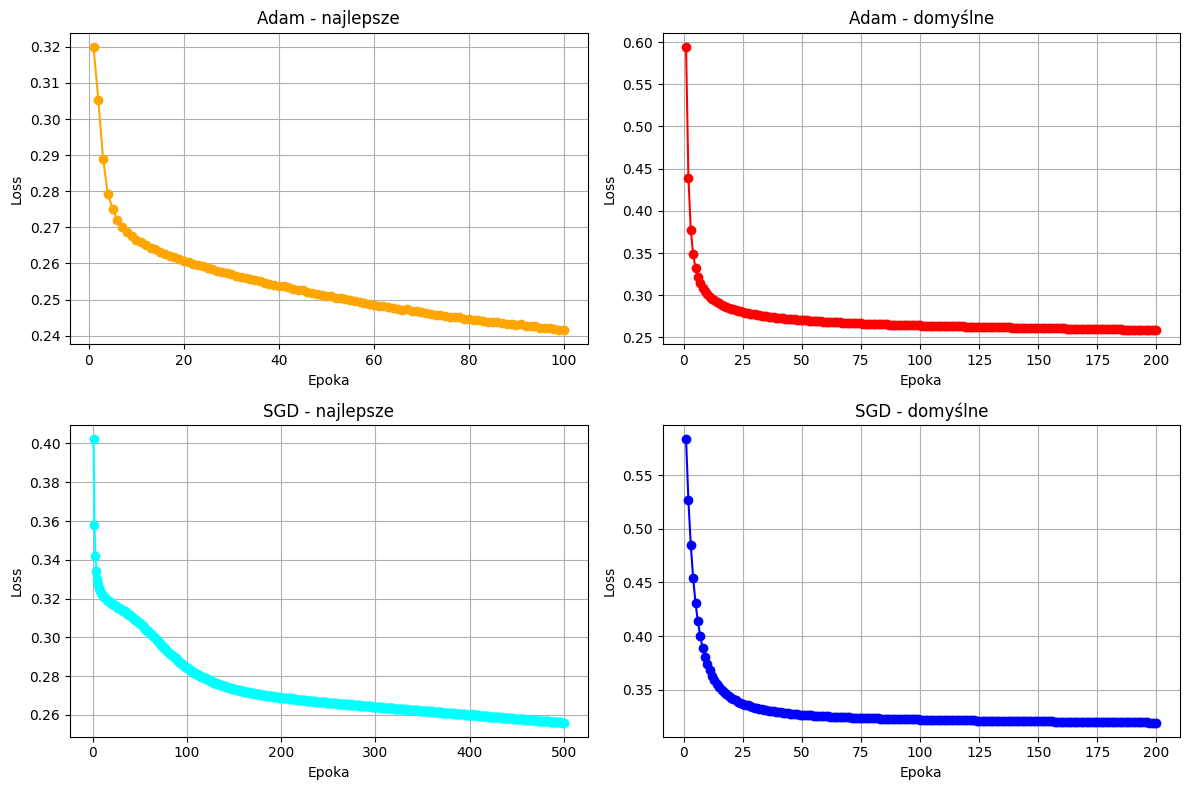

In [15]:
import matplotlib.pyplot as plt
import numpy as np

history_adam_best = histories_adam[0]
history_adam_default = histories_adam_default[0]
history_sgd_best = histories_sgd[0]
history_sgd_default = histories_sgd_default[0]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# wykres 1: Adam najlepsze
epochs = np.arange(1, len(history_adam_best)+1)
axes[0].plot(epochs, history_adam_best, color='orange', marker='o', linestyle='-')
axes[0].set_title('Adam - najlepsze')
axes[0].set_xlabel('Epoka')
axes[0].set_ylabel('Loss')
axes[0].grid(True)

# wykres 2: Adam domyślne
epochs = np.arange(1, len(history_adam_default)+1)
axes[1].plot(epochs, history_adam_default, color='red', marker='o', linestyle='-')
axes[1].set_title('Adam - domyślne')
axes[1].set_xlabel('Epoka')
axes[1].set_ylabel('Loss')
axes[1].grid(True)

# wykres 3: SGD najlepsze
epochs = np.arange(1, len(history_sgd_best)+1)
axes[2].plot(epochs, history_sgd_best, color='cyan', marker='o', linestyle='-')
axes[2].set_title('SGD - najlepsze')
axes[2].set_xlabel('Epoka')
axes[2].set_ylabel('Loss')
axes[2].grid(True)

# wykres 4: SGD domyślne
epochs = np.arange(1, len(history_sgd_default)+1)
axes[3].plot(epochs, history_sgd_default, color='blue', marker='o', linestyle='-')
axes[3].set_title('SGD - domyślne')
axes[3].set_xlabel('Epoka')
axes[3].set_ylabel('Loss')
axes[3].grid(True)

plt.tight_layout()
plt.savefig('loss_wykres.png')
plt.show()

In [16]:
print("Porównanie accuracy na zbiorze testowym:")
print(f"SGD domyślne: {np.mean(final_test_accs_d):.4f} ± {np.std(final_test_accs_d):.4f}")
print(f"SGD najlepsze: {np.mean(final_test_accs):.4f} ± {np.std(final_test_accs):.4f}")
print(f"Adam domyślne: {np.mean(final_test_accs_adam_d):.4f} ± {np.std(final_test_accs_adam_d):.4f}")
print(f"Adam najlepsze: {np.mean(final_test_accs_adam):.4f} ± {np.std(final_test_accs_adam):.4f}")

Porównanie accuracy na zbiorze testowym:
SGD domyślne: 0.4641 ± 0.0319
SGD najlepsze: 0.5712 ± 0.0345
Adam domyślne: 0.5647 ± 0.0443
Adam najlepsze: 0.5850 ± 0.0334
